In [5]:
import numpy as np
import matplotlib.pyplot as plt

a = 2
b = 5

def generate_linearly_separable_data(size):
    data = np.zeros((size, 2))
    labels = np.zeros(size)

    for i in range(size):
        x1 = np.random.randint(-200, 200)
        x2 = np.random.randint(-200, 200)
        label = 1 if x2 > linear_function(x1, a, b) else 0
        data[i] = [x1, x2]
        labels[i] = label

    return data, labels

def linear_function(x, a, b):
    return a * x + b

def heaviside(x):
    return 1 if x > 0 else 0

class Perceptron:
    def __init__(self):
        self.weights = np.random.rand(2)
        self.bias = np.random.rand()

    def predict(self, features):
        weighted_sum = np.dot(features, self.weights) + self.bias
        return heaviside(weighted_sum)

    def train(self, training_features, labels, epochs=100):
        for epoch in range(epochs):
            errors = 0
            for features, label in zip(training_features, labels):
                prediction = self.predict(features)
                error = label - prediction

                if error != 0:
                    self.weights += error * features
                    self.bias += error
                    errors += 1
            print(f"Epoch {epoch}: Weights = {self.weights}, Bias = {self.bias}")

            if errors == 0:
                print(f"Training complete after {epoch + 1} epochs.")
                break

def visualize_data(perceptron, data, labels, is_test=False):
    x_values = np.linspace(-200, 200, 100)
    y_values = -(perceptron.weights[0] * x_values + perceptron.bias) / perceptron.weights[1]

    plt.plot(x_values, y_values, label="Decision Boundary", color='green')

    for label in np.unique(labels):
        color = 'red' if label == 0 else 'blue'
        plt.scatter(data[labels == label][:, 0], data[labels == label][:, 1], color=color, label=f'Class {label}')

    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.title("Perceptron Classification" + (" (Test)" if is_test else ""))
    plt.legend()
    plt.grid(True)
    plt.show()

def test_perceptron(perceptron, test_data):
    predictions = []
    for point in test_data:
        prediction = perceptron.predict(point)
        predictions.append(prediction)
    return predictions


Epoch 0: Weights = [-238.13744656  113.9705677 ], Bias = -2.4316158178545138
Epoch 1: Weights = [-238.13744656  113.9705677 ], Bias = -2.4316158178545138
Training complete after 2 epochs.


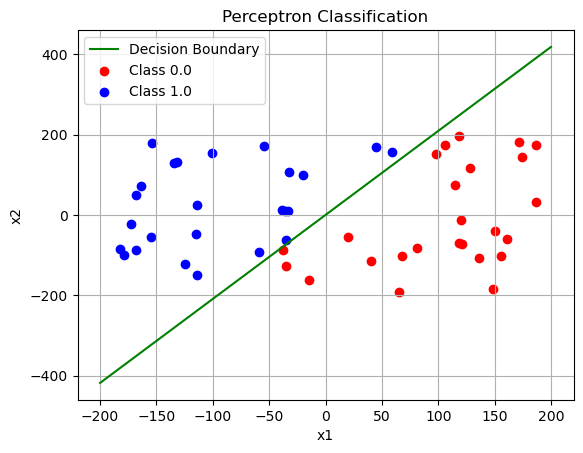

In [7]:
if __name__ == "__main__":
    data, labels = generate_linearly_separable_data(50)

    perceptron = Perceptron()
    perceptron.train(data, labels)

    visualize_data(perceptron, data, labels)

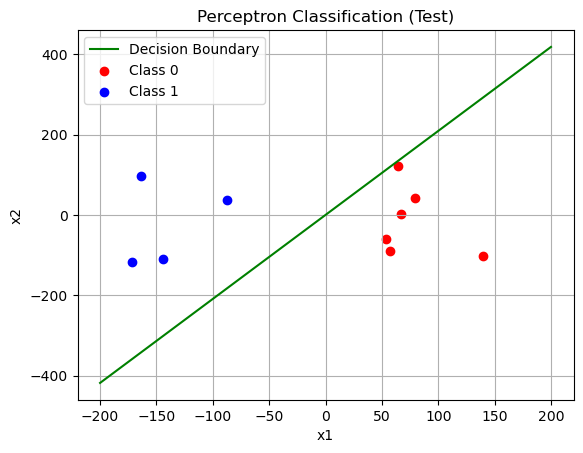

In [9]:
    new_data, new_labels = generate_linearly_separable_data(10)

    predictions = test_perceptron(perceptron, new_data)

    visualize_data(perceptron, new_data, predictions, is_test=True)